# Exploratory Data Analysis

## Imports

In [1]:
import numpy as np
import pandas as pd
import warnings
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sys.path.append(os.path.abspath(os.path.join('../scripts')))
from df_cleaner import *

In [3]:
%matplotlib inline
warnings.filterwarnings("ignore")

## Reading Data

In [4]:
# reading the csv file
missing_values = ["n/a", "na", "undefined"]
df = pd.read_csv("../data/AdSmartABdata.csv", na_values=missing_values)
df

,auction_id,experiment,date,hour,device_make,platform_os,browser,yes,no
0,0008ef63-77a7-448b-bd1e-075f42c55e39,exposed,2020-07-10,8,Generic Smartphone,6,Chrome Mobile,0,0
1,000eabc5-17ce-4137-8efe-44734d914446,exposed,2020-07-07,10,Generic Smartphone,6,Chrome Mobile,0,0
2,0016d14a-ae18-4a02-a204-6ba53b52f2ed,exposed,2020-07-05,2,E5823,6,Chrome Mobile WebView,0,1
3,00187412-2932-4542-a8ef-3633901c98d9,control,2020-07-03,15,Samsung SM-A705FN,6,Facebook,0,0
4,001a7785-d3fe-4e11-a344-c8735acacc2c,control,2020-07-03,15,Generic Smartphone,6,Chrome Mobile,0,0
...,...,...,...,...,...,...,...,...,...
8072,ffea24ec-cec1-43fb-b1d1-8f93828c2be2,exposed,2020-07-05,7,Generic Smartphone,6,Chrome Mobile,0,0
8073,ffea3210-2c3e-426f-a77d-0aa72e73b20f,control,2020-07-03,15,Generic Smartphone,6,Chrome Mobile,0,0
8074,ffeaa0f1-1d72-4ba9-afb4-314b3b00a7c7,control,2020-07-04,9,Generic Smartphone,6,Chrome Mobile,0,0
8075,ffeeed62-3f7c-4a6e-8ba7-95d303d40969,exposed,2020-07-05,15,Samsung SM-A515F,6,Samsung Internet,0,0


## General Statistics

In [5]:
# number of elements in the df
df.size

72693

In [6]:
# rows and columns in the df
df.shape

(8077, 9)

In [7]:
# non-null counts and data types of columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8077 entries, 0 to 8076
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   auction_id   8077 non-null   object
 1   experiment   8077 non-null   object
 2   date         8077 non-null   object
 3   hour         8077 non-null   int64 
 4   device_make  8077 non-null   object
 5   platform_os  8077 non-null   int64 
 6   browser      8077 non-null   object
 7   yes          8077 non-null   int64 
 8   no           8077 non-null   int64 
dtypes: int64(4), object(5)
memory usage: 568.0+ KB


In [8]:
# descriptive statistics that summarize the central tendency, dispersion of the df's numerical columns, excluding NaN values
df.describe()

,hour,platform_os,yes,no
count,8077.000000,8077.000000,8077.000000,8077.000000
mean,11.615080,5.947134,0.070818,0.083075
std,5.734879,0.224333,0.256537,0.276013
min,0.000000,5.000000,0.000000,0.000000
25%,7.000000,6.000000,0.000000,0.000000
50%,13.000000,6.000000,0.000000,0.000000
75%,15.000000,6.000000,0.000000,0.000000
max,23.000000,7.000000,1.000000,1.000000


## Missing Values

In [9]:
percent_missing_values(df)

The dataset contains 0.0 % missing values.


## Univariate Analysis

### Auction Id

In [10]:
# unique value counts
unique_counts = df['auction_id'].nunique()
unique_counts

8077

This indicates that each auction id is unique.

### Experiment

In [11]:
# unique value counts
counts_df = df['experiment'].value_counts()
counts_df

control    4071
exposed    4006
Name: experiment, dtype: int64

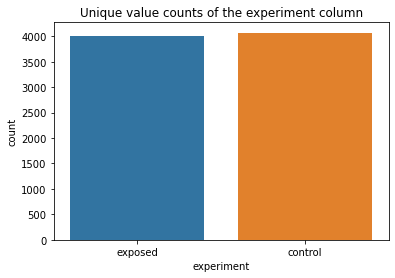

In [12]:
sns.countplot(data=df, x='experiment')
plt.title('Unique value counts of the experiment column');

This show us that the grouping of control and exposed is balanced in terms of numbers.

### Date

In [13]:
# unique value counts
counts_df = df['date'].value_counts()
counts_df

2020-07-03    2015
2020-07-09    1208
2020-07-08    1198
2020-07-04     903
2020-07-10     893
2020-07-05     890
2020-07-06     490
2020-07-07     480
Name: date, dtype: int64

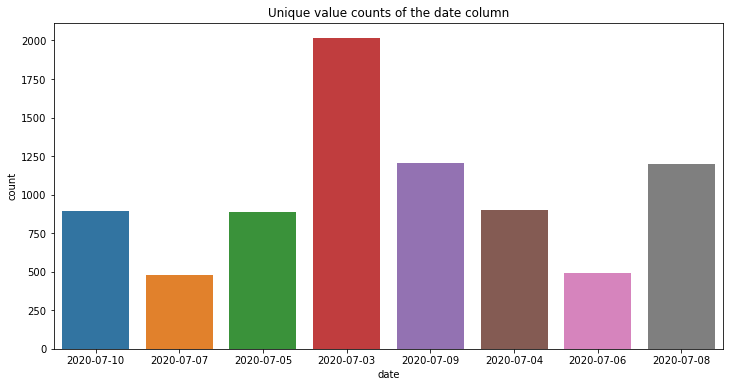

In [14]:
plt.figure(figsize=(12, 6))
plt.title('Unique value counts of the date column');
sns.countplot(data=df, x='date')
plt.show()

From the plot we can infer that the first day has recieved the highest number of visitors from the rest of the days.

### Hour

In [15]:
# unique value counts
counts_df = df['hour'].value_counts()
counts_df

15    1895
8      394
7      381
9      346
10     336
16     335
6      327
14     319
5      302
13     290
11     282
4      281
12     278
18     273
3      266
20     264
17     263
2      230
19     227
1      222
21     206
0      194
22     135
23      31
Name: hour, dtype: int64

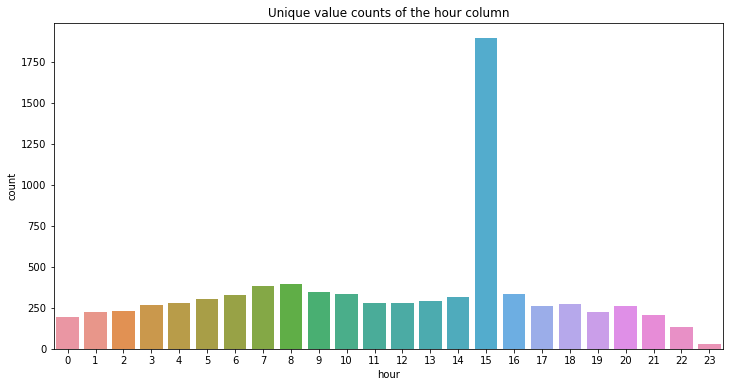

In [16]:
plt.figure(figsize=(12, 6))
plt.title('Unique value counts of the hour column')
sns.countplot(data=df, x='hour')
plt.show()

Hour 15 was the most busiest as the visitors traffic was very high almost 3 times the average of the rest hours.

### Device

In [17]:
# unique value counts
counts_df = df['device_make'].value_counts()
counts_df

Generic Smartphone    4743
iPhone                 433
Samsung SM-G960F       203
Samsung SM-G973F       154
Samsung SM-G950F       148
                      ... 
VF-795                   1
D5803                    1
Samsung SM-G610F         1
Lenovo P2a42             1
VKY-L09                  1
Name: device_make, Length: 270, dtype: int64

In [18]:
df['device_make'].nunique()

270

### Platform OS

In [19]:
# unique value counts
counts_df = df['platform_os'].value_counts()
counts_df

6    7648
5     428
7       1
Name: platform_os, dtype: int64

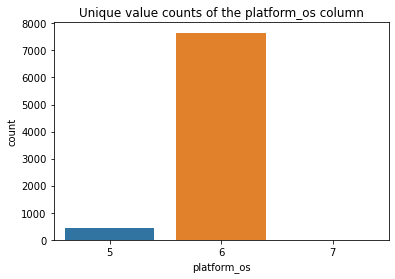

In [20]:
sns.countplot(data=df, x='platform_os')
plt.title('Unique value counts of the platform_os column');

### Browser

In [21]:
# unique value counts
counts_df = df['browser'].value_counts()
counts_df

Chrome Mobile                 4554
Chrome Mobile WebView         1489
Samsung Internet               824
Facebook                       764
Mobile Safari                  337
Chrome Mobile iOS               51
Mobile Safari UI/WKWebView      44
Pinterest                        3
Chrome                           3
Opera Mobile                     3
Edge Mobile                      1
Puffin                           1
Firefox Mobile                   1
Android                          1
Opera Mini                       1
Name: browser, dtype: int64

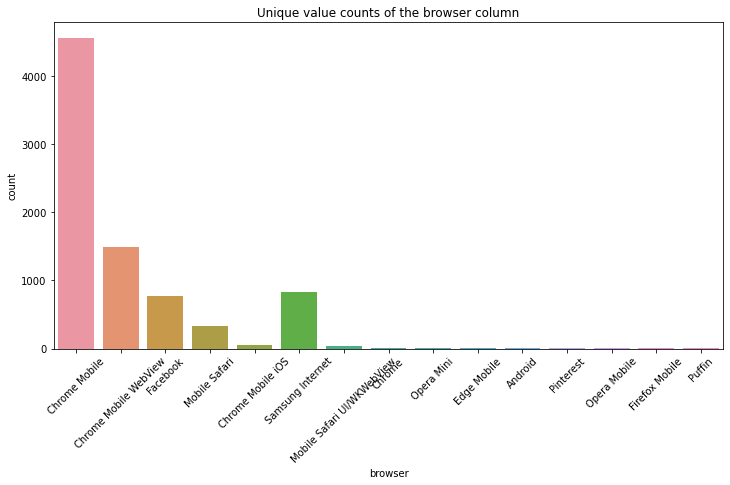

In [22]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x="browser")
plt.title('Unique value counts of the browser column')
plt.xticks(rotation=45)
plt.show()

Chrome browsers are the most used browsers among the users.

### Yes

In [23]:
# unique value counts
counts_df = df['yes'].value_counts()
counts_df

0    7505
1     572
Name: yes, dtype: int64

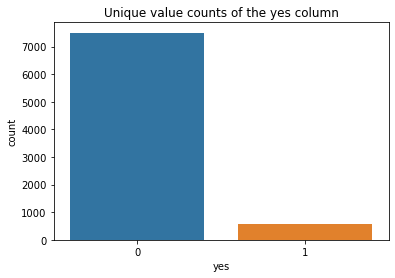

In [24]:
sns.countplot(data=df, x="yes")
plt.title('Unique value counts of the yes column')
plt.show()

### No

In [25]:
# unique value counts
counts_df = df['no'].value_counts()
counts_df

0    7406
1     671
Name: no, dtype: int64

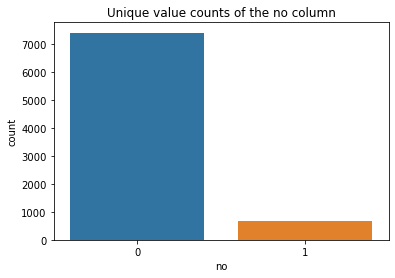

In [26]:
sns.countplot(data=df, x="no")
plt.title('Unique value counts of the no column')
plt.show()

## Bivariate Analysis

### Experiment and Date

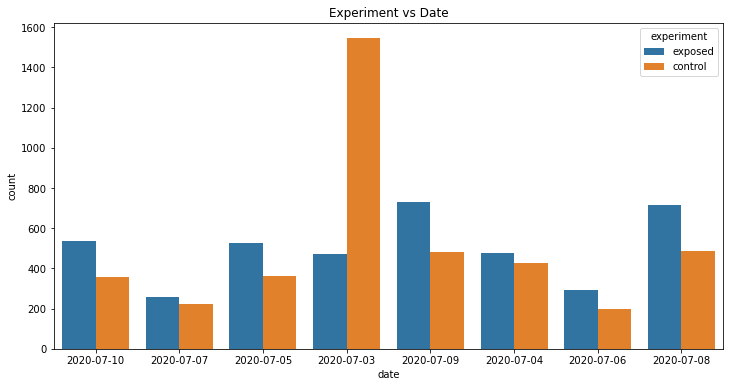

In [27]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x="date", hue="experiment")
plt.title('Experiment vs Date')
plt.show()

In the first day around 3/4 of the visitors were from the control group. The rest of the days saw the dominance of the exposed group.

### Experiment and Hour

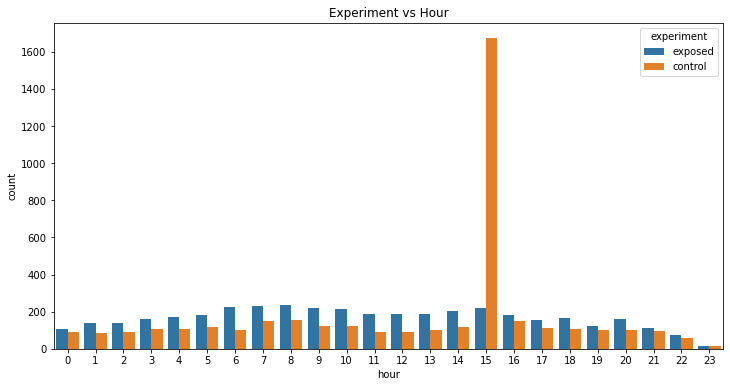

In [28]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x="hour", hue="experiment")
plt.title('Experiment vs Hour')
plt.show()

Users from the control group were the most active at hour 15.

### Experiment and Browser

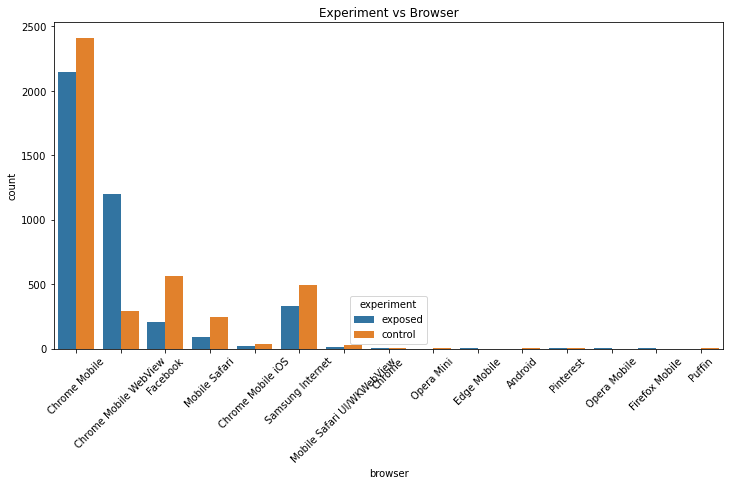

In [29]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x="browser", hue="experiment")
plt.title('Experiment vs Browser')
plt.xticks(rotation=45)
plt.show()

### Experiment and OS

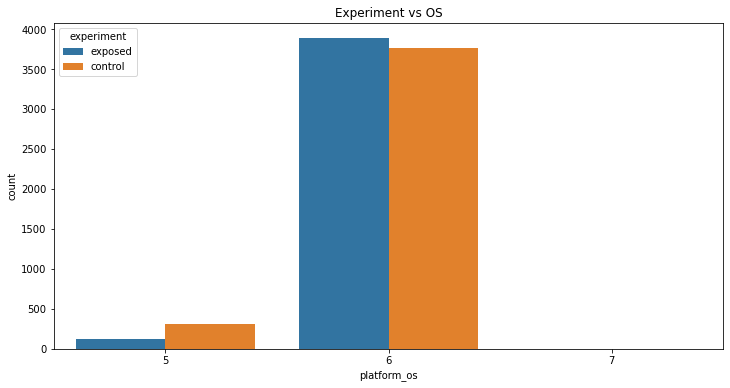

In [30]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x="platform_os", hue="experiment")
plt.title('Experiment vs OS')
plt.show()

### Experiment and Yes

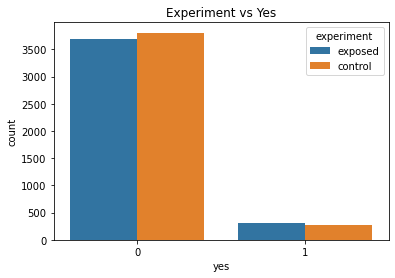

In [31]:
sns.countplot(data=df, x="yes", hue="experiment")
plt.title('Experiment vs Yes')
plt.show()

### Experiment and No

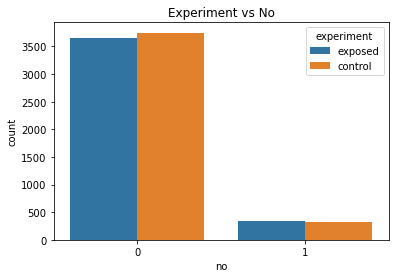

In [32]:
sns.countplot(data=df, x="no", hue="experiment")
plt.title('Experiment vs No')
plt.show()

## Correlation Analysis

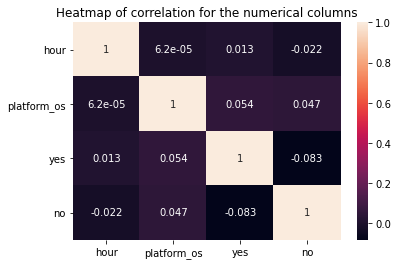

In [33]:
corr = df.corr()
sns.heatmap(corr, annot=True)
plt.title('Heatmap of correlation for the numerical columns')
plt.show()

There is no significant correlation between the numerical columns.